### What is the MNIST dataset? 
The MNIST dataset is a large set of images of handwritten digits. It is probably the most common dataset used to test deep learning models that operate on images or perform image processing. It contains 28x28 images, each containing a handwritten digit from 0-9. Every image has an output label associated with it, denoting the digit represented by the image.

![](http://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png)

The input dimensions of the input are (N, 28, 28) and the output dimensions are (N) where N is the number of samples under consideration. 

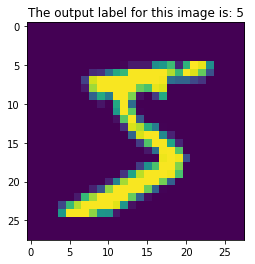

The shape of x_train is  (60000, 28, 28)
The shape of y_train is  (60000,)


In [21]:
# Let us import some libraries first
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from matplotlib import pyplot as plt

# Keras comes with the MNIST dataset built-in!
from keras.datasets import mnist 

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Let's plot one of the samples
plt.imshow(x_train[0])
plt.title("The output label for this image is: "+ str(y_train[0]))
plt.show()

# Let us also see the shape of the data
print("The shape of x_train is ", x_train.shape)
print("The shape of y_train is ", y_train.shape)

##### Now, let us quickly build a simple classifier using keras
First, we'll need to do some preprocessing - Since we're using a simple feedforward network, the input must be one-dimensional. 
However, our input data consists of images, so we'll have to find a way to convert 2D images to 1D input that can be fed into the network. The simplest way to do this is to flatten our images into a vector. Hence, we'll be converting our 28x28 image to a vector of length 784 (28*28 = 784). We'll also convert our output labels to one-hot encoded vectors since we're performing multi-class classification.

In [22]:
# Some basic normalization for the pixel intensities
# Note that MNIST has grayscale images
x_train = x_train/255
x_test = x_test/255

# Flattening the input
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1,784)

# One-hot encoding for the output
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(784, input_shape=(784, )))
model.add(Dense(784))
model.add(Dense(10, activation="softmax")) # Because we have 10 output classes
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size = 100)

Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.4075 - acc: 0.88502s - loss: 0.4113 - acc - ETA: 1s - los
Epoch 2/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.3353 - acc: 0.9050
Epoch 3/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.3186 - acc: 0.9102
Epoch 4/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.3112 - acc: 0.9132
Epoch 5/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.3028 - acc: 0.9152
Epoch 6/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2957 - acc: 0.9163
Epoch 7/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.2909 - acc: 0.9182
Epoch 8/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.2867 - acc: 0.9199
Epoch 9/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.2843 - acc: 0.9192
Epoch 10/10
60000/60000 [==================

In [26]:
loss, acc = model.evaluate(x_test, y_test)
print("Final score: Loss=",loss," Accuracy =",acc * 100,"%")

10000/10000 [==============================] - 3s 266us/step
Final score: Loss= 0.2993020266771316  Accuracy = 91.9 %


In [28]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_21 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


## Neat!
We trained a feed-forward network to classify MNIST images. The accuracy was pretty good too!
Remember that good preprocessing is as important as building a powerful model.